# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

602


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | belushya guba.
City not found...skipping belushya guba.
Processing Record 1  of Set 1 | kapaa.
Processing Record 2  of Set 1 | tsihombe.
City not found...skipping tsihombe.
Processing Record 3  of Set 1 | chuy.
Processing Record 4  of Set 1 | ushuaia.
Processing Record 5  of Set 1 | auki.
Processing Record 6  of Set 1 | khor.
Processing Record 7  of Set 1 | khatanga.
Processing Record 8  of Set 1 | de-kastri.
Processing Record 9  of Set 1 | illoqqortoormiut.
City not found...skipping illoqqortoormiut.
Processing Record 10  of Set 1 | jamestown.
Processing Record 11  of Set 1 | narsaq.
Processing Record 12  of Set 1 | rabaul.
Processing Record 13  of Set 1 | saint-francois.
Processing Record 14  of Set 1 | severo-kurilsk.
Processing Record 15  of Set 1 | bauchi.
Processing Record 16  of Set 1 | taolanaro.
City not found...skipping taolanaro.
Processing Record 17  of Set 1 | tuktoyaktuk.
Processing Rec

Processing Record 32  of Set 4 | sioux lookout.
Processing Record 33  of Set 4 | brae.
Processing Record 34  of Set 4 | yellowknife.
Processing Record 35  of Set 4 | los llanos de aridane.
Processing Record 36  of Set 4 | san quintin.
Processing Record 37  of Set 4 | prince rupert.
Processing Record 38  of Set 4 | phan thiet.
Processing Record 39  of Set 4 | macaboboni.
City not found...skipping macaboboni.
Processing Record 40  of Set 4 | bilibino.
Processing Record 41  of Set 4 | gushikawa.
Processing Record 42  of Set 4 | cairns.
Processing Record 43  of Set 4 | coihaique.
Processing Record 44  of Set 4 | fairbanks.
Processing Record 45  of Set 4 | richards bay.
Processing Record 46  of Set 4 | norman wells.
Processing Record 47  of Set 4 | linxia.
Processing Record 48  of Set 4 | sao joao da barra.
Processing Record 49  of Set 4 | itarema.
Processing Record 0  of Set 5 | tete.
Processing Record 1  of Set 5 | esperance.
Processing Record 2  of Set 5 | port elizabeth.
Processing Reco

Processing Record 12  of Set 8 | kloulklubed.
Processing Record 13  of Set 8 | ayios yeoryios.
Processing Record 14  of Set 8 | babanusah.
City not found...skipping babanusah.
Processing Record 15  of Set 8 | kiruna.
Processing Record 16  of Set 8 | celestun.
Processing Record 17  of Set 8 | ayame.
Processing Record 18  of Set 8 | mitu.
Processing Record 19  of Set 8 | port hedland.
Processing Record 20  of Set 8 | banff.
Processing Record 21  of Set 8 | shache.
Processing Record 22  of Set 8 | samusu.
City not found...skipping samusu.
Processing Record 23  of Set 8 | malangwa.
Processing Record 24  of Set 8 | nikolskoye.
Processing Record 25  of Set 8 | pangnirtung.
Processing Record 26  of Set 8 | saryshagan.
City not found...skipping saryshagan.
Processing Record 27  of Set 8 | agirish.
Processing Record 28  of Set 8 | gazojak.
Processing Record 29  of Set 8 | pacific grove.
Processing Record 30  of Set 8 | alofi.
Processing Record 31  of Set 8 | baykit.
Processing Record 32  of Set

Processing Record 36  of Set 11 | miles city.
Processing Record 37  of Set 11 | tuy hoa.
Processing Record 38  of Set 11 | tazovskiy.
Processing Record 39  of Set 11 | maniitsoq.
Processing Record 40  of Set 11 | ambulu.
Processing Record 41  of Set 11 | sandpoint.
Processing Record 42  of Set 11 | krasnoselkup.
Processing Record 43  of Set 11 | san clemente.
Processing Record 44  of Set 11 | nanortalik.
Processing Record 45  of Set 11 | kasongo-lunda.
Processing Record 46  of Set 11 | kieta.
Processing Record 47  of Set 11 | sai buri.
Processing Record 48  of Set 11 | contamana.
Processing Record 49  of Set 11 | tshikapa.
Processing Record 0  of Set 12 | zhanakorgan.
Processing Record 1  of Set 12 | palana.
Processing Record 2  of Set 12 | amderma.
City not found...skipping amderma.
Processing Record 3  of Set 12 | nome.
Processing Record 4  of Set 12 | port hawkesbury.
Processing Record 5  of Set 12 | arkadelphia.
Processing Record 6  of Set 12 | coari.
Processing Record 7  of Set 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:

# Data Count
weather_df.count()

City                602
Country             602
Date                602
Latitude            602
Longitude           602
Cloudiness (%)      602
Humidity (%)        602
Max Temp (F)        602
Wind Speed (mph)    602
dtype: int64

In [8]:
# Display DataFrame
weather_df.head()


,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,belushya guba,,,,,,,,
1,kapaa,US,2020-10-10 12:19:33,22.08,-159.32,20,69,80.87,5.7
2,tsihombe,,,,,,,,
3,chuy,UY,2020-10-10 12:19:33,-33.7,-53.46,0,60,61.358,2.93
4,ushuaia,AR,2020-10-10 12:19:33,-54.8,-68.3,20,37,53.87,6.2


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


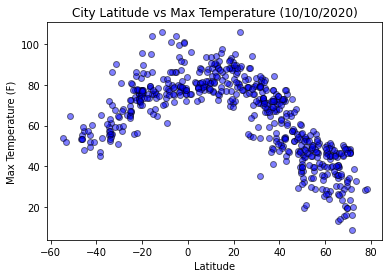

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as we generally move away from the equator, temperature drops")

## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


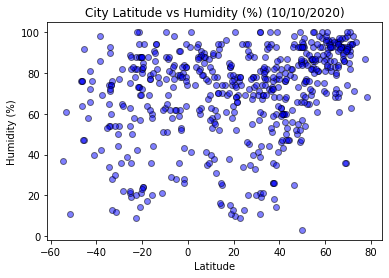

In [11]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

## Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


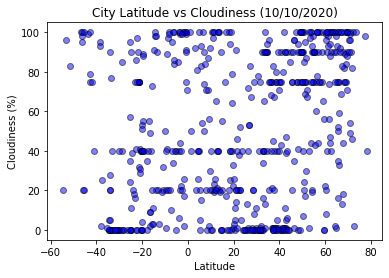

In [12]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")

## Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


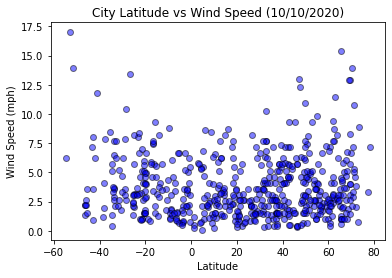

In [13]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.89x + 96.09
The r-squared is: -0.8647003928638521
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


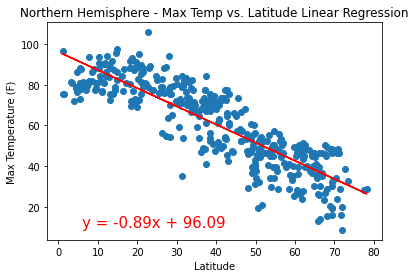

In [15]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


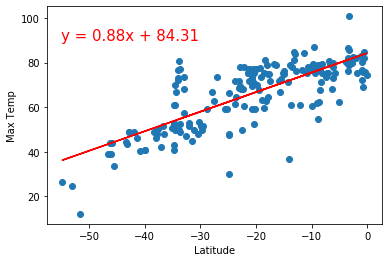

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


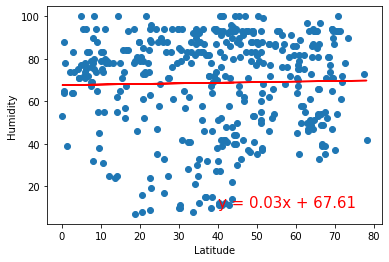

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


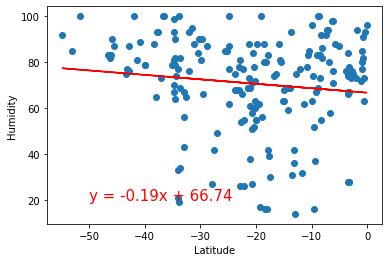

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


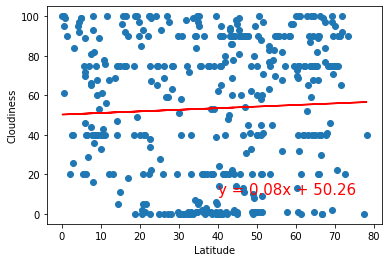

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


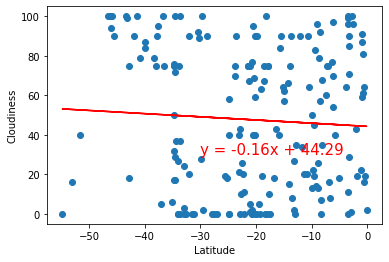

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


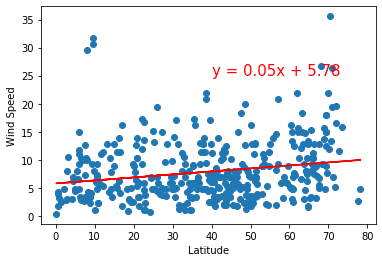

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


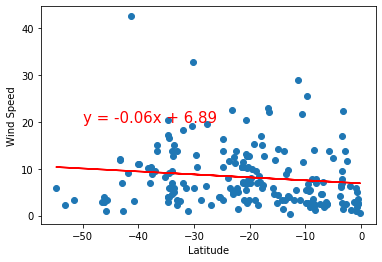